In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
ts = pd.read_csv("TATASTEEL.csv")

In [3]:
ts.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TISCO,EQ,142.35,148.00,153.2,146.10,152.50,152.45,150.92,2003185,3.023164e+13,NaN,NaN,NaN
1,2000-01-04,TISCO,EQ,152.45,150.10,153.0,143.05,151.95,150.80,151.03,1555136,2.348785e+13,NaN,NaN,NaN
2,2000-01-05,TISCO,EQ,150.80,144.60,162.9,144.60,158.00,156.55,156.85,3840284,6.023364e+13,NaN,NaN,NaN
3,2000-01-06,TISCO,EQ,156.55,158.95,169.1,158.95,169.00,168.25,167.61,2560449,4.291530e+13,NaN,NaN,NaN
4,2000-01-07,TISCO,EQ,168.25,173.40,179.0,166.30,170.55,171.95,173.89,3641691,6.332459e+13,NaN,NaN,NaN


In [4]:
ts.Date = pd.to_datetime(ts.Date)

In [5]:
ts.index = ts.Date
ts.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,TISCO,EQ,142.35,148.00,153.2,146.10,152.50,152.45,150.92,2003185,3.023164e+13,NaN,NaN,NaN
2000-01-04,2000-01-04,TISCO,EQ,152.45,150.10,153.0,143.05,151.95,150.80,151.03,1555136,2.348785e+13,NaN,NaN,NaN
2000-01-05,2000-01-05,TISCO,EQ,150.80,144.60,162.9,144.60,158.00,156.55,156.85,3840284,6.023364e+13,NaN,NaN,NaN
2000-01-06,2000-01-06,TISCO,EQ,156.55,158.95,169.1,158.95,169.00,168.25,167.61,2560449,4.291530e+13,NaN,NaN,NaN
2000-01-07,2000-01-07,TISCO,EQ,168.25,173.40,179.0,166.30,170.55,171.95,173.89,3641691,6.332459e+13,NaN,NaN,NaN


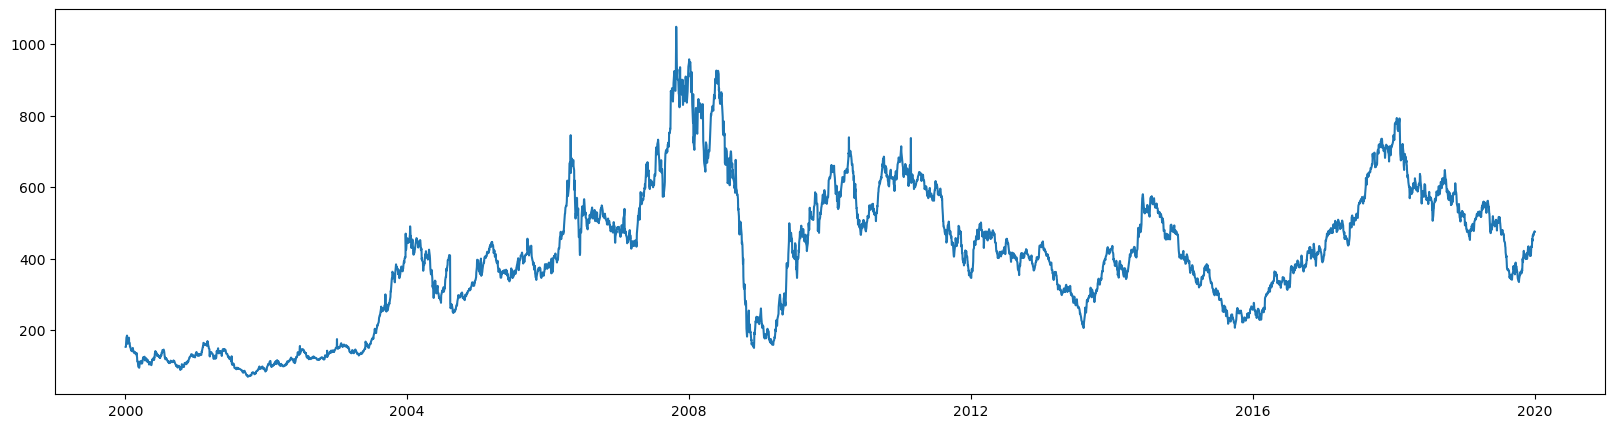

In [6]:
plt.figure(figsize = (20,5))
plt.plot(ts['High'])
#          ['2007-01-01':'2009-12-26'])

In [7]:
arr = np.array(ts['High'])
ts = ts['High']

In [8]:
log_ts = np.log(ts)

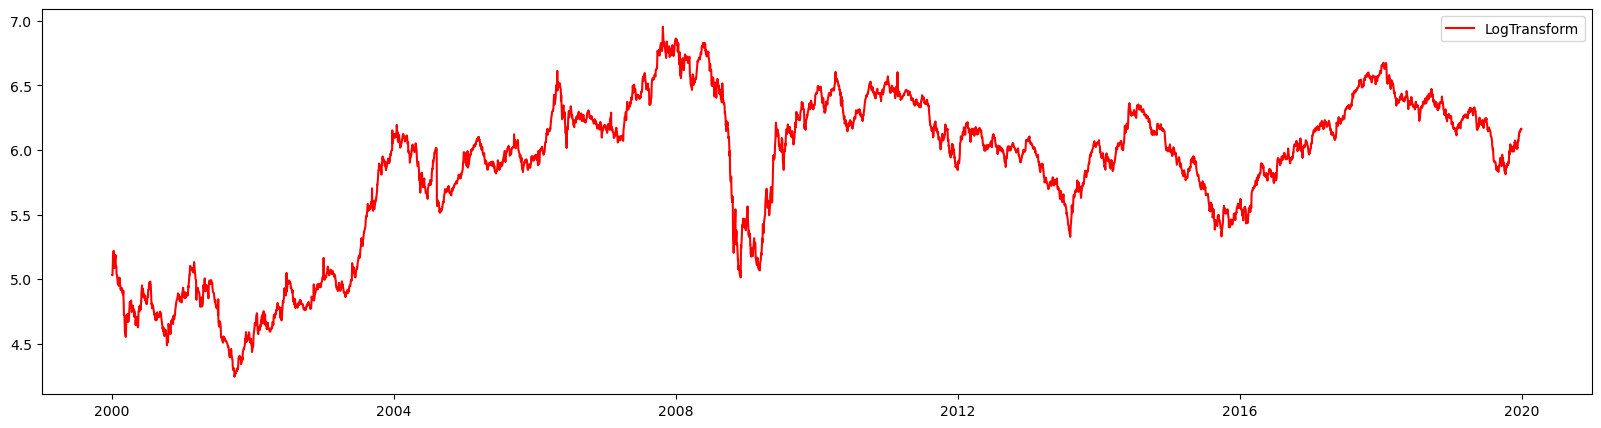

In [9]:
plt.figure(figsize = (20,5))
# plt.plot(ts.index,arr,c = 'b',label = 'Original')
plt.plot(log_ts,c = 'r',label = 'LogTransform')
plt.legend()

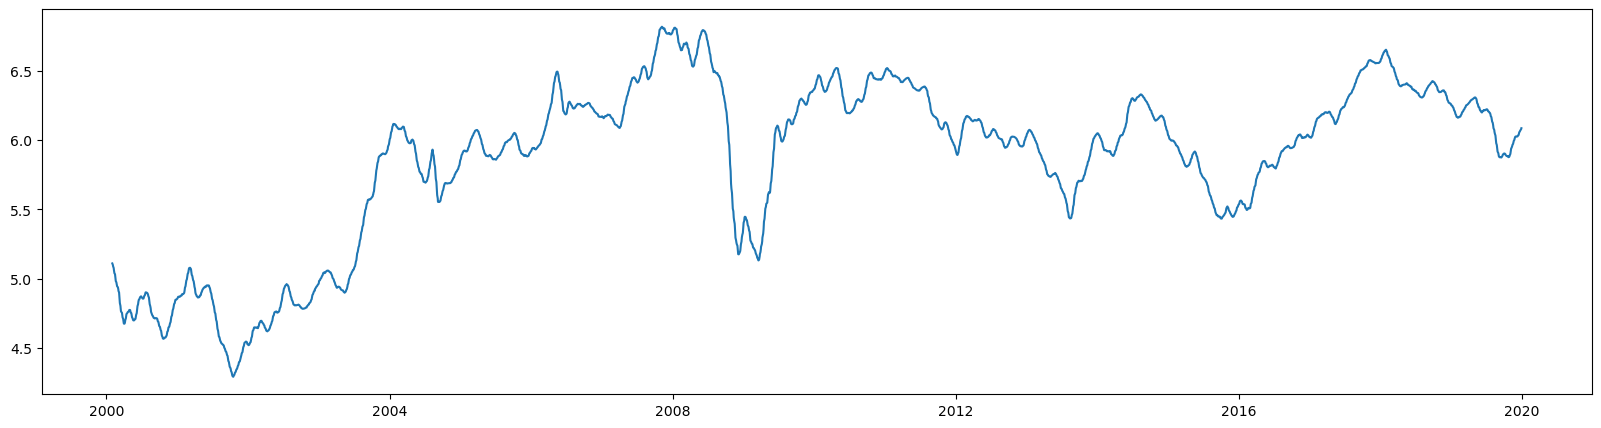

In [10]:
plt.figure(figsize = (20,5))
rollmean = log_ts.rolling(20).mean()
rollstd = log_ts.rolling(20).std()
# plt.plot(rollstd)
plt.plot(rollmean)

In [11]:
# ts = ts['2010-01-01':'2016-06-06']
log_ts = np.log(ts)
ts.isna().sum()

0

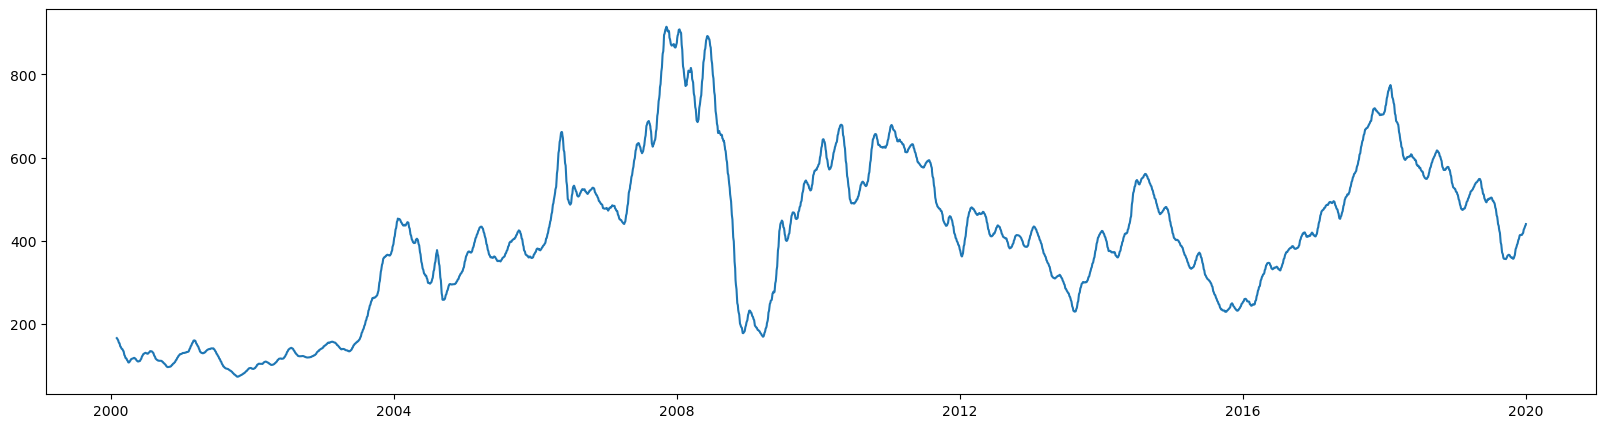

In [12]:
plt.figure(figsize = (20,5))
# ts.plot()
rollmean = ts.rolling(20).mean()
rollmean2 = log_ts.rolling(20).mean()
plt.plot(rollmean)
# plt.plot(rollmean2,c = 'r')

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
result = adfuller(ts)
log_result = adfuller(log_ts)

In [15]:
print("for ts :  %f"%result[0])
print("p value %f"%result[1])
print("for log_ts : %f"%log_result[0])
print("p value : %f"%log_result[1])

for ts :  -2.463346
p value 0.124649
for log_ts : -2.041567
p value : 0.268650


In [16]:
diff_ts = (ts - ts.shift()).dropna()
diff_log_ts = (log_ts - log_ts.shift()).dropna()
diff_result = adfuller(diff_ts)
diff_log_result = adfuller(diff_log_ts)

In [17]:
print("for diff_ts :  %f"%diff_result[0])
print("p value %f"%diff_result[1])
print("for diff_log_ts : %f"%diff_log_result[0])
print("p value : %f"%diff_log_result[1])

for diff_ts :  -13.756981
p value 0.000000
for diff_log_ts : -19.531472
p value : 0.000000


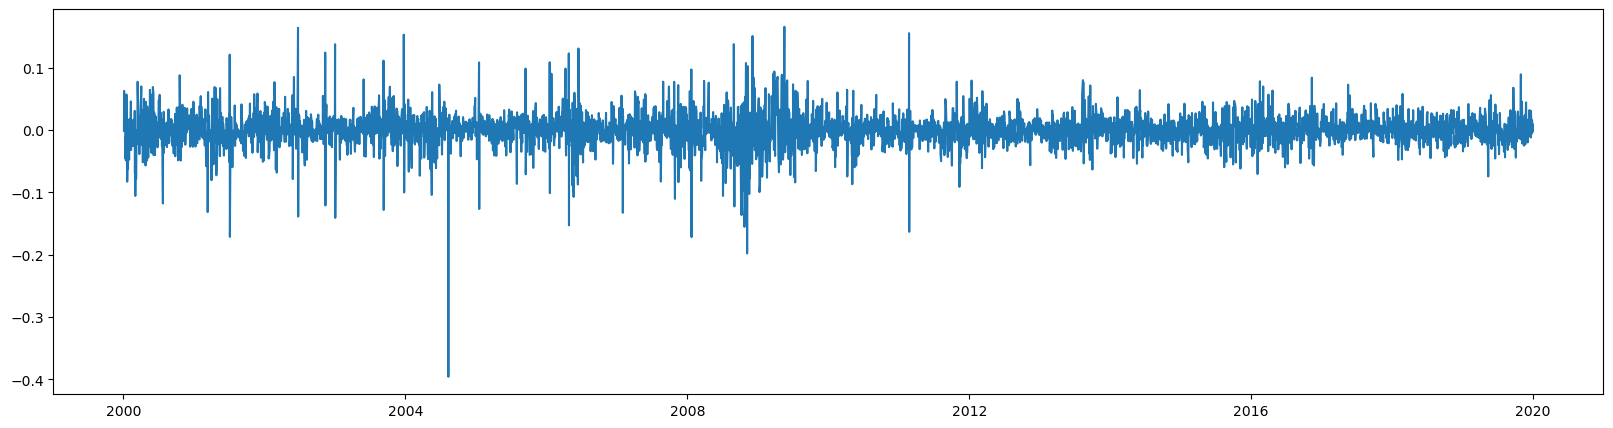

In [18]:
plt.figure(figsize = (20,5))
plt.plot(diff_log_ts)

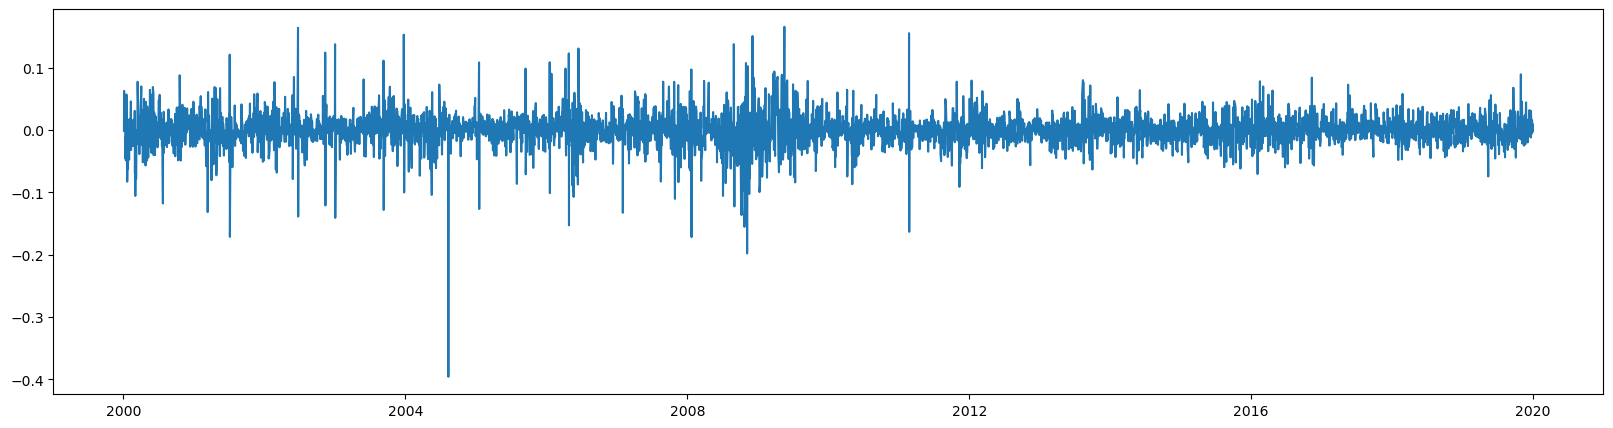

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decompose = seasonal_decompose(diff_log_ts.dropna(),period = 1) 
plt.figure(figsize = (20,5))
plt.plot(decompose.trend)

<Figure size 2000x500 with 0 Axes>

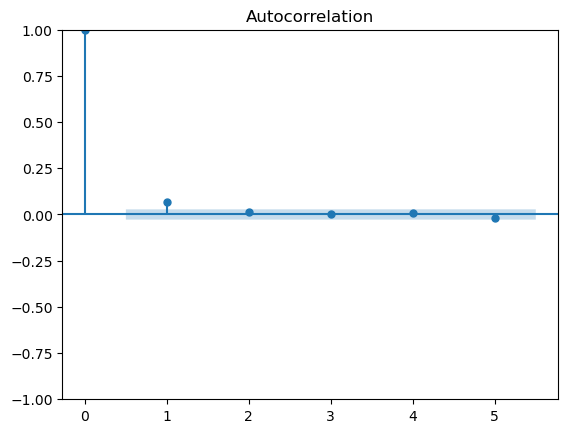

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (20,5))
plot_acf(diff_log_ts,lags = 5)
plt.show()

<Figure size 2000x500 with 0 Axes>

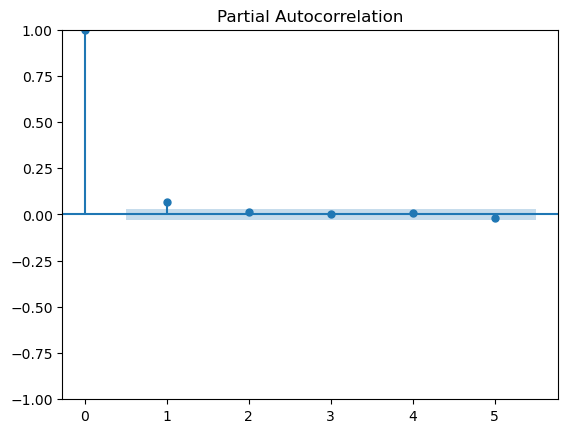

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize = (20,5))
plot_pacf(diff_log_ts,lags = 5)
plt.show()

In [22]:
import statsmodels.api as sm

C:\Users\vidit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vidit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vidit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vidit\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


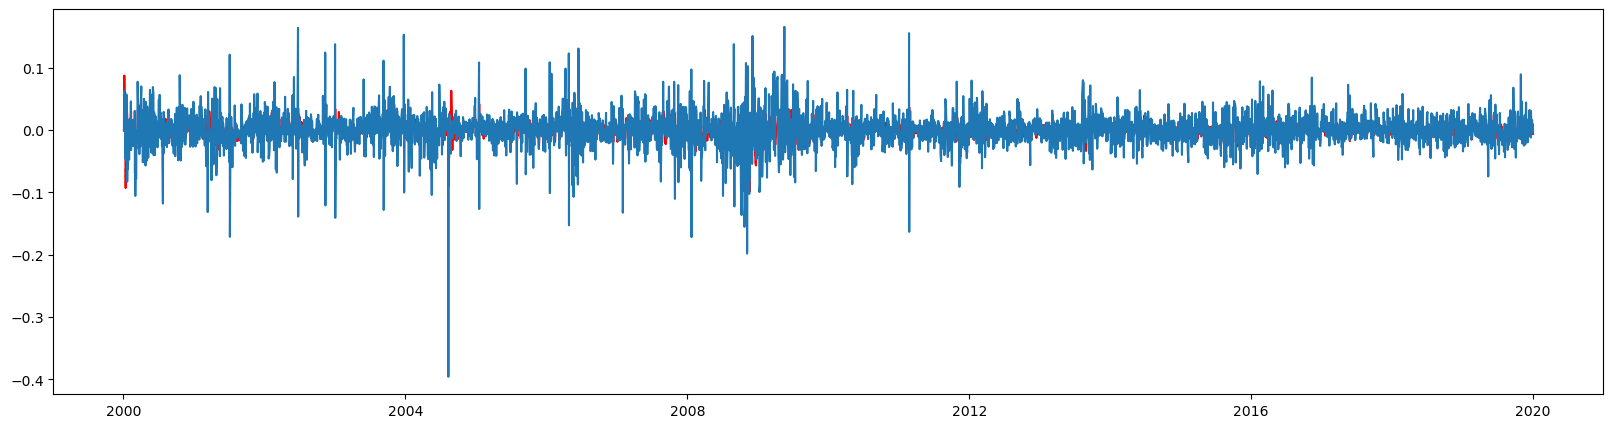

In [23]:
model = sm.tsa.arima.ARIMA(diff_log_ts,order = (14,1,3))
result = model.fit()
plt.figure(figsize = (20,5))
plt.plot(result.fittedvalues,c = 'r')
plt.plot(diff_log_ts)

In [24]:
from sklearn import metrics
from math import sqrt
error  = sqrt(metrics.mean_squared_error(result.fittedvalues,diff_log_ts))
print(error)


0.02830052915867224


In [25]:
# diff_log_ts_predict = pd.Series(result.fittedvalues)
# result.fittedvalues

In [26]:
# diff_log_ts_predict_cumsum = diff_log_ts_predict.cumsum()
# print(diff_log_ts_predict_cumsum)
# log_predict = pd.Series(log_ts.iloc[0],index = log_ts.index)
# log_predict = log_predict.add(diff_log_ts_predict_cumsum,fill_value = 0)
# print(log_predict)

In [27]:
# plt.figure(figsize = (20,5))
# plt.plot(np.exp(log_predict),c = 'r',label = 'predicted')
# plt.plot(ts,label = 'original')
# plt.legend()

In [28]:
# error = sqrt(np.sum((np.exp(log_predict)-np.array(ts))**2)/len(ts))
# print(error)

In [29]:
test = pd.read_csv('TATASTEEL.csv')
test.Date = pd.to_datetime(test.Date)
test.index = test.Date
test = test['High']['2016-06-06':'2017-06-06']

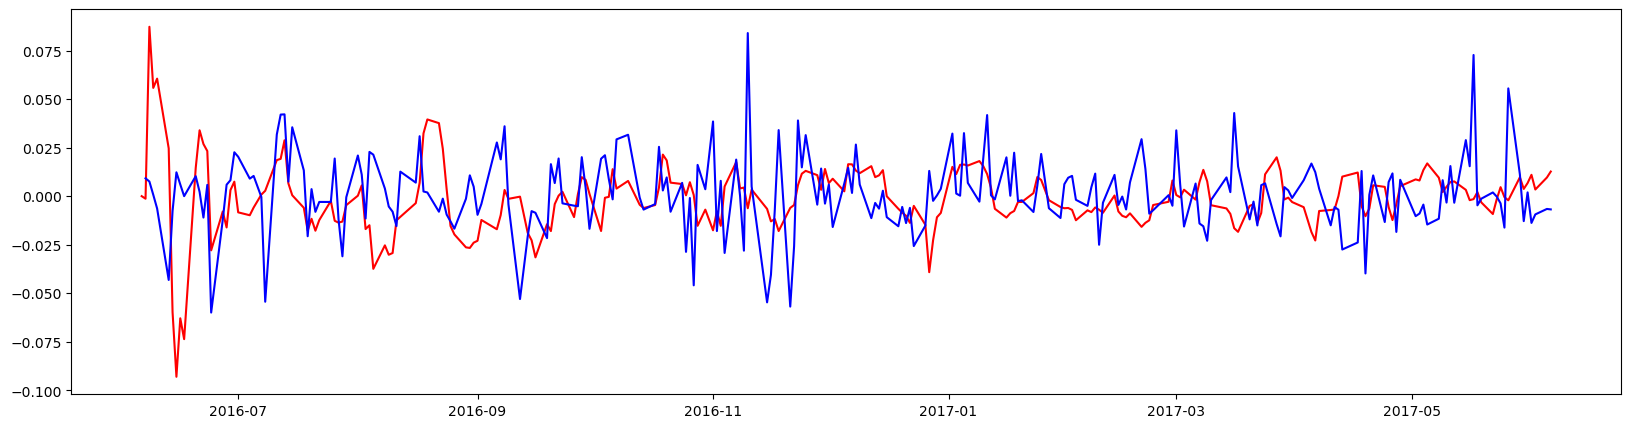

In [30]:

diff_log_pred = result.predict(start = 0 ,end = len(test) - 1 ,typ = 'levels')
# print(len(pred)," ",len(test))
log_test = np.log(test)
diff_log_test = (log_test - log_test.shift()).dropna()
plt.figure(figsize = (20,5))
diff_log_pred.index = test.index 

plt.plot(diff_log_pred,c = 'r',label = 'predicted')
plt.plot(diff_log_test,c = 'b')
# print(len(diff_log_test),len(diff_log_pred))
# print(sqrt(metrics.mean_squared_error(diff_log_test,diff_log_pred[1:])))

In [31]:
# diff_log_pred

In [32]:
diff_log_predict_cumsum = diff_log_pred.cumsum()
base = pd.Series(np.log(test).iloc[0],index = test.index)
log_predict = base.add(diff_log_predict_cumsum)
# log_predict

In [33]:
predict = np.exp(log_predict)
predict

Date
2016-06-06    340.700000
2016-06-07    340.255222
2016-06-08    371.276916
2016-06-09    392.569173
2016-06-10    417.068096
                 ...    
2017-05-31    225.218067
2017-06-01    227.708549
2017-06-02    228.491255
2017-06-05    230.695338
2017-06-06    233.640361
Length: 249, dtype: float64

In [34]:
# predict

In [35]:
# test


188.0812758359547


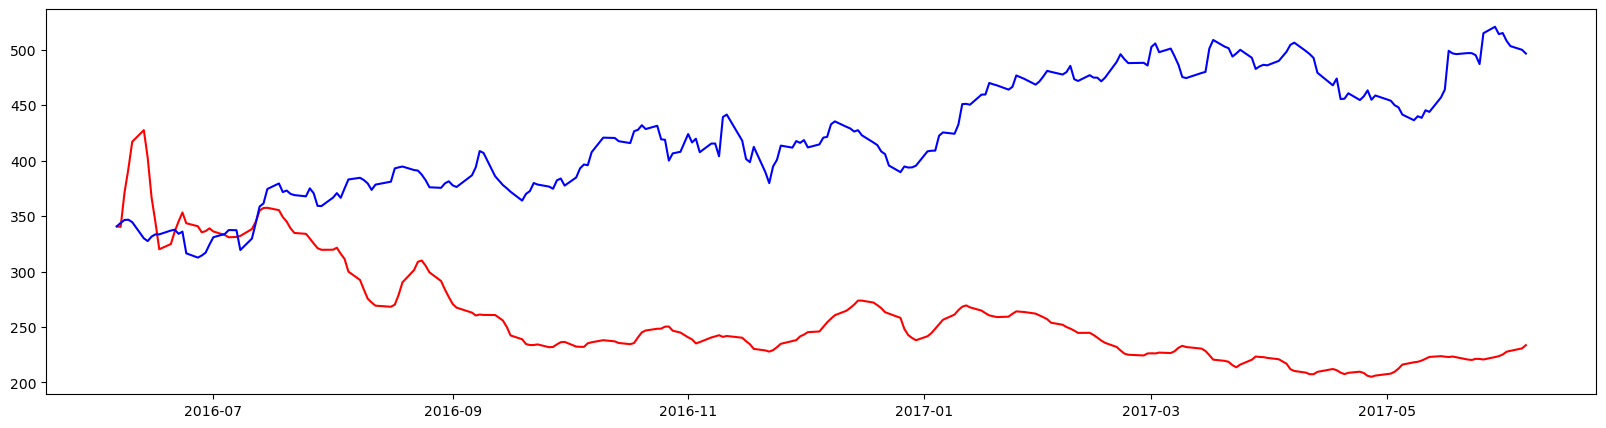

In [36]:
plt.figure(figsize = (20,5))
plt.plot(predict,c = 'r')
plt.plot(test,c = 'b')
# print(sqrt((np.sum((np.array(predict)-np.array(test))**2))/len(test)))
from sklearn import metrics
from math import sqrt
print(sqrt(metrics.mean_squared_error(predict,test)))

In [37]:
# from math import sqrt
# from sklearn import metrics
# import warnings
# warnings.filterwarnings('ignore')
# x = np.log(test).iloc[0]
# print(len(test))
# mini = 106
# minp,minid,miniq = 9,1,2

# for p in range(10,20):
#     for d in range(3):
#         for q in range(5):
#             model = sm.tsa.arima.ARIMA(diff_log_ts,order = (p,d,q))
#             result = model.fit()
#             diff_log_pred = result.predict(start = 0,end = len(test)-1,typ = 'levels')
#             diff_log_pred.index = test.index
#             diff_log_pred_cumsum = diff_log_pred.cumsum()
#             base = pd.Series(x,index = test.index)
#             log_pred = base.add(diff_log_pred_cumsum)
#             pred = np.exp(log_pred)
#             error = sqrt((np.sum((np.array(pred)-np.array(test))**2))/len(test))
#             if(error<mini):
#                 mini = error
#                 minip,minid,miniq = p,d,q
#             print(p,d,q,error)
# print(minip,minid,miniq,mini)

In [38]:
310    410       510    611  704    813  912

SyntaxError: invalid syntax (1998878782.py, line 1)

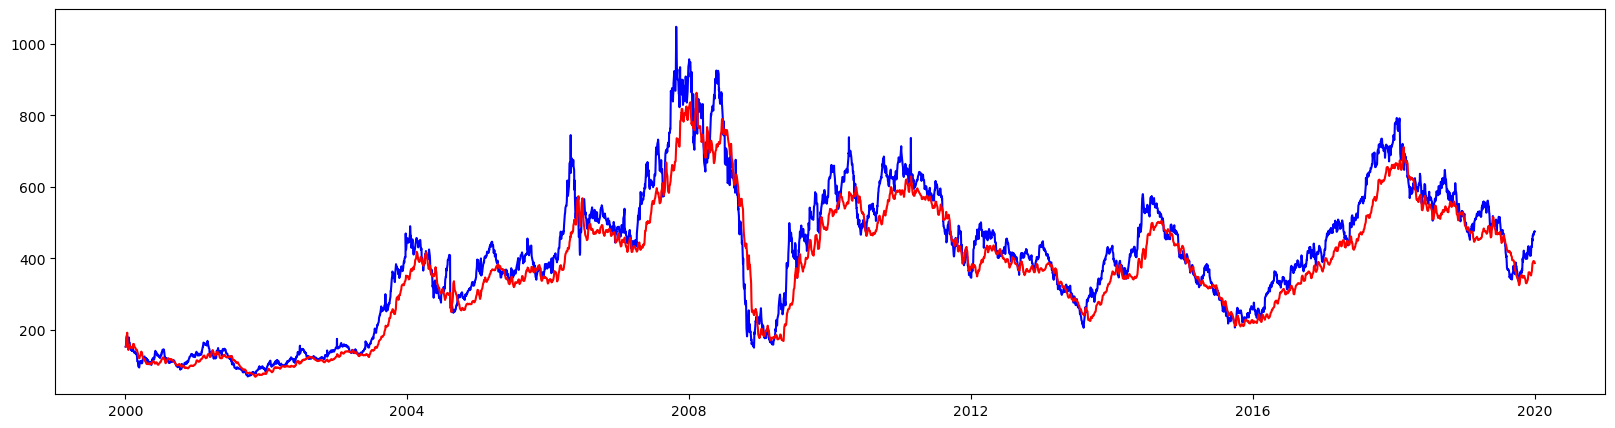

In [39]:
diff_log_fit = result.fittedvalues
diff_log_fit_cumsum = diff_log_fit.cumsum()
baseSeries = pd.Series(log_ts.iloc[0],index = diff_log_ts.index)
log_fit = baseSeries.add(diff_log_fit_cumsum)
fitval = np.exp(log_fit)
plt.figure(figsize = (20,5))
plt.plot(ts,c = 'b')
plt.plot(fitval,c = 'r')

In [40]:
error = sqrt(metrics.mean_squared_error(ts[1:],fitval))
print(error)
# print(len(ts))
# print(len(fitval))

61.138578640576604
